# Practice notebook for multivariate analysis using NHANES data

This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data.  These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [3]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

<AxesSubplot:xlabel='BPXDI1', ylabel='BPXDI2'>

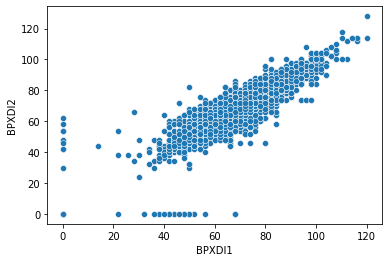

In [4]:
sns.scatterplot(data=da, x="BPXDI1", y="BPXDI2")

In [9]:
da[["BPXDI1","BPXDI2",'BPXSY1', 'BPXSY2']].dropna().corr()

,BPXDI1,BPXDI2,BPXSY1,BPXSY2
BPXDI1,1.000000,0.884722,0.317497,0.329843
BPXDI2,0.884722,1.000000,0.277681,0.298392
BPXSY1,0.317497,0.277681,1.000000,0.962287
BPXSY2,0.329843,0.298392,0.962287,1.000000


__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

The correlation between repeated measurements of systolic blood pressure is greater than the correlation between repeated measurements of diastolic blood pressure

__Q2a.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

The first systolic and first diastolic blood pressure measure are more correlated than the second systolic and second diastolic blood pressure measure

## Question 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

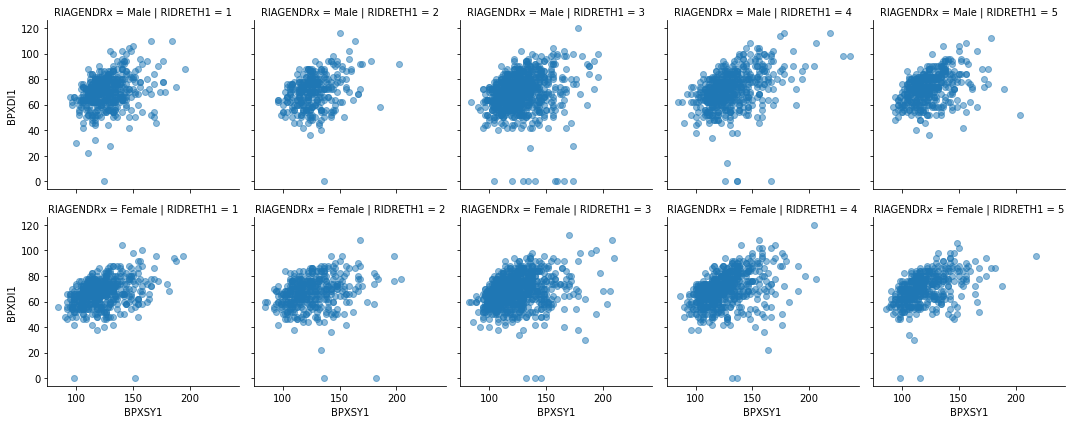

In [14]:
#creation of more descriptive  gender column
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"}) 

sns.FacetGrid(da, col="RIDRETH1",  row="RIAGENDRx").map(plt.scatter, "BPXSY1", "BPXDI1", alpha=0.5).add_legend()

__Q3a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

The fourth and fifth ethnic group appear to have the best correlation for both genders. It appears as though gender does not affect the correlation as much as ethinicity does.

## Question 3

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

In [15]:
#creation of more descriptive  education attainment column
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DMDEDUC2x', ylabel='RIDAGEYR'>

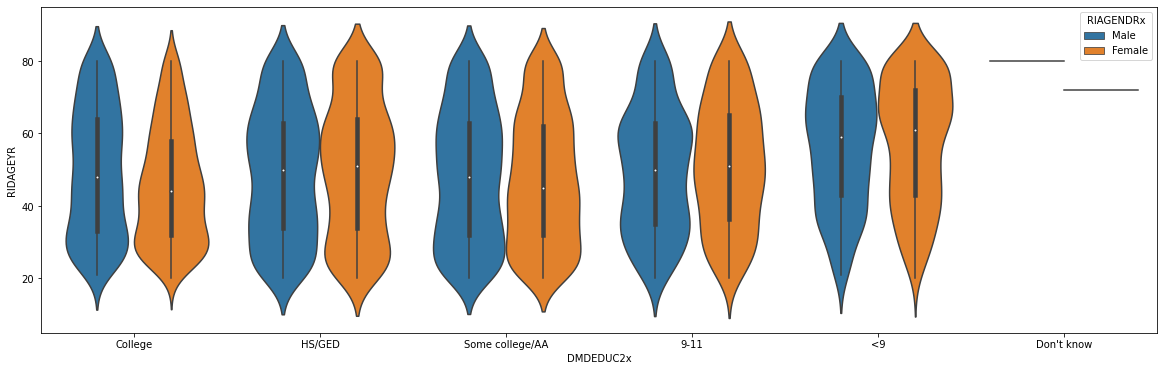

In [19]:
#increasing figure size
plt.figure(figsize=(20, 6))

sns.violinplot(da.DMDEDUC2x, da.RIDAGEYR, hue=da.RIAGENDRx)

__Q4a.__ Comment on any evident differences among the age distributions in the different demographic groups.

One major difference in the age distributions that standsour to me is that most older people have less than 9th grade education

## Question 4

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

In [20]:
# creation of age bands
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


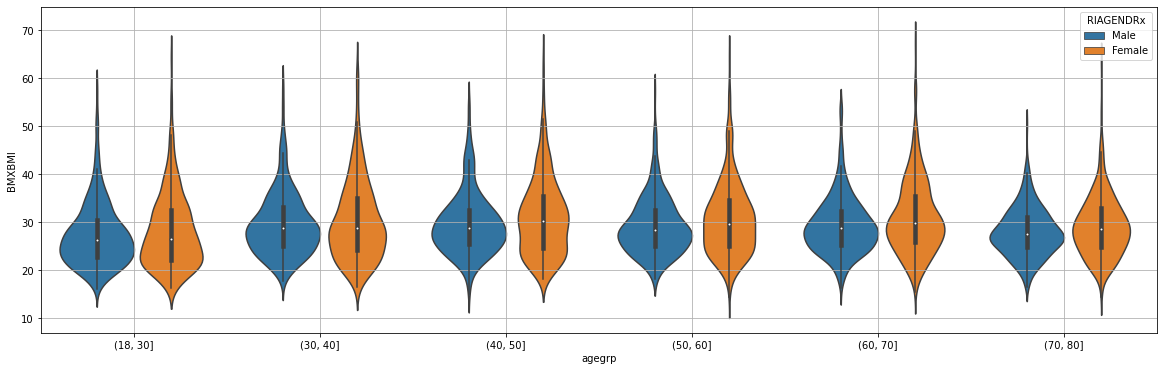

In [23]:
plt.figure(figsize=(20, 6))

sns.violinplot(da.agegrp, da.BMXBMI, hue=da.RIAGENDRx)

plt.grid(which="both")

__Q5a.__ Comment on the trends in BMI across the demographic groups.

- females tend to have more spread in their distributions especially in categories 40-50 and 50-60
- the mean BMI increases from 18-30 to 30-40 and kind of maintains this level before dropping from 60-70 to 70-80 

## Question 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [28]:
x = pd.crosstab(da.RIDRETH1, da.HIQ210)
x.apply(lambda z:z/z.sum(), axis=1)

HIQ210,1.0,2.0,9.0
RIDRETH1,,,
1,0.137982,0.857567,0.004451
2,0.128696,0.871304,0.000000
3,0.067354,0.931432,0.001214
4,0.108654,0.890385,0.000962
5,0.081761,0.915723,0.002516


__Q6a.__ Which ethnic group has the highest rate of being uninsured in the past year?

Ethnic group 1 because 1.0 indicates a positive respose to the question:
In the past 12 months, was there any time when {you/SP} did not have any health insurance coverage?